In [9]:
##### script to try the Galaxy Cluster DM generation

#--------------------
# imports
#--------------------

import os, sys, glob
import numpy as np
from utils import rotate_data, readsnapsgl, write_fits_image,plot_cluster
from astropy.cosmology import FlatLambdaCDM 

Code='GadgetX' # the simulation code
path="/home2/weiguang/The300/data/" 
#groupinfo=np.loadtxt("/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/G3X_Mass_snap_128-center-cluster.txt")
Simun = "simulation/"+Code+"/"
Outdir = './'

Use_Lra = True # use less rotations

# two arguments given to the function, the first and the last region



RAs = np.loadtxt('29_rotations.txt',dtype=np.int32)

selecth=np.load('/home2/weiguang/Project-300-Clusters/ML/Reselected_all_halos.npy')
#HID M200 Rid

    
#------------    
# Open data
#------------

for lp in [4]:
    clnum='0000'+str(lp)
    clnum=clnum[-4:]
    cname = "NewMDCLUSTER_"+clnum+"/"

    # Check outputs
    outcat = cname + "/"
    if not os.path.exists(outcat):
        os.mkdir(outcat)

    idr = np.where(np.int32(selecth[:,2]+0.1)==lp)[0]
    if len(idr)<1:
        raise ValueError('No regions find in selected halo',lp)

    Hids = np.int64(selecth[idr,0]+0.1)    #AHF halo IDs
    sn = np.array([np.int32(str(i)[:3]) for i in Hids])
    idshid=np.argsort(Hids)
    Hids=Hids[idshid]; sn=sn[idshid]; idr=idr[idshid]
    st=0
    
    for j, s, hid in zip(idr, sn , Hids): # loop over snaps
        print(j,s,hid)
        snapname = 'snap_'+str(s)
        #print(snapname)
        #ds = yt.load(path+Simun+cname+snapname, field_spec="my_def") # it can also be done using yt
        snapfile = path+Simun+cname+snapname
        
        head=readsnapsgl(path+Simun+cname+snapname,'HEAD')
        if head.Redshift<0:
            head.Redshift = 0.0000

        # load the data 
        particle = 1
        pos = readsnapsgl(snapfile, 'POS ', ptype=particle)
        mass = readsnapsgl(snapfile, 'MASS', ptype=particle)
        print('path = ',snapfile)
        
        


        
        
        #------------    
        # Cuts
        #------------
        
        
        halo = np.load('/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/GadgetX/G3X_Mass_snap_'+str(s)+'info.npy')
        idg = np.where((halo[:,0]==lp) & (halo[:,1]==hid))[0]
        if len(idg) == 1:
            cc = halo[idg[0],4:7]; rr = halo[idg[0],7]
        else:
            raise ValueError('Halo not find.... ',lp,hid)
        
        # apply mask
        
        mask2= np.where((pos[:,0]<=cc[0]+2*rr)&(pos[:,0]>=cc[0]-2*rr)&
                (pos[:,1]<=cc[1]+2*rr)&(pos[:,1]>=cc[1]-2*rr)&
                (pos[:,2]<=cc[2]+2*rr)&(pos[:,2]>=cc[2]-2*rr))
    
        

        pos_inside = pos[mask2]
        mass_inside = mass[mask2]
        pos_centered = pos_inside
        
        pos_inside_gas = pos_gas[mask2]
        
        pos_inside_star = pos_star[mask2]
        mass_inside_star = mass_star[mask2]
        
        
        #center the data to be rotated
        pos_inside[:,0] = pos_inside[:,0]-cc[0]
        pos_inside[:,1] = pos_inside[:,1]-cc[1]
        pos_inside[:,2] = pos_inside[:,2]-cc[2]
        
        pos_inside_gas[:,0] = pos_inside_gas[:,0]-cc[0]
        pos_inside_gas[:,1] = pos_inside_gas[:,1]-cc[1]
        pos_inside_gas[:,2] = pos_inside_gas[:,2]-cc[2]
        
        pos_inside_star[:,0] = pos_inside_star[:,0]-cc[0]
        pos_inside_star[:,1] = pos_inside_star[:,1]-cc[1]
        pos_inside_star[:,2] = pos_inside_star[:,2]-cc[2]
        
        
        def indices_inside(pos,r,center = (0,0,0)): 

            x = pos[:,0]
            y = pos[:,1]
            z = pos[:,2]

            mask = np.where((x**2+y**2+z**2)<r**2)

            return mask
        
        mask_sphere = indices_inside(pos_inside,rr)
        print('spherical mass = ', mass_inside[mask_sphere].sum())
        
        mask_sphere = indices_inside(pos_inside_gas,rr)
        print('spherical mass = ', mass_inside_gas[mask_sphere].sum())
        
        mask_sphere = indices_inside(pos_inside_star,rr)
        print('spherical mass = ', mass_inside_star[mask_sphere].sum())
        
        
        #------------    
        # Rotations
        #------------
        ra = 0
        RA = RAs[0]
        rot = rotate_data(pos_inside,RA)[0]
        mask = np.where((rot[:,0]<=rr)&(rot[:,0]>=-rr)&
                (rot[:,1]<=rr)&(rot[:,1]>=-rr)&
                (rot[:,2]<=rr)&(rot[:,2]>=-rr))
        rot = rot[mask]
        
        w = mass_inside[mask]
        #------------    
        # Create the 2D projection
        #------------
        N = 640
        x = rot[:, 0] 
        y = rot[:,1] 
        img,xedges,yedges = np.histogram2d(x,y,bins=(N,N),weights=w)
        img = img.T
        plot_cluster(img)
        print('masa map', img.sum())
        print('masa escalar',w.sum())
        #------------    
        # Save data
        #------------
            
 

    # et voila


266 123 123000000000001
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  386008680
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  386008680
VEL  386008680
ID   128669560
MASS 128669560
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0004/snap_123
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  386008680
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  386008680
VEL  386008680
ID   128669560
MASS 128669560
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0004/snap_123
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  386008680
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  386008680
VEL  386008680
ID   128669560
MASS 128669560
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCL

IndexError: index 7599344 is out of bounds for axis 0 with size 7598492

In [2]:
mass = readsnapsgl(snapfile, 'MASS', ptype=particle)

detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
VEL  364441476
ID   121480492
MASS 121480492


In [6]:
mass

array([0.02362952, 0.02363071, 0.00796717, ..., 0.02363749, 0.0236445 ,
       0.02363685], dtype=float32)

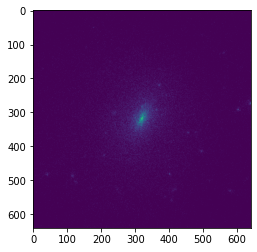

In [28]:
##### script to try the Galaxy Cluster DM generation

#--------------------
# imports
#--------------------

import os, sys, glob
import numpy as np
from utils import rotate_data, readsnapsgl, write_fits_image,plot_cluster
from astropy.cosmology import FlatLambdaCDM 

Code='GadgetX' # the simulation code
path="/home2/weiguang/The300/data/" 
#groupinfo=np.loadtxt("/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/G3X_Mass_snap_128-center-cluster.txt")
Simun = "simulation/"+Code+"/"
Outdir = './'

Use_Lra = True # use less rotations

# two arguments given to the function, the first and the last region



RAs = np.loadtxt('29_rotations.txt',dtype=np.int32)

selecth=np.load('/home2/weiguang/Project-300-Clusters/ML/Reselected_all_halos.npy')
#HID M200 Rid

    
#------------    
# Open data
#------------

for lp in [1]:
    clnum='0000'+str(lp)
    clnum=clnum[-4:]
    cname = "NewMDCLUSTER_"+clnum+"/"

    # Check outputs
    outcat = cname + "/"
    if not os.path.exists(outcat):
        os.mkdir(outcat)

    idr = np.where(np.int32(selecth[:,2]+0.1)==lp)[0]
    if len(idr)<1:
        raise ValueError('No regions find in selected halo',lp)

    Hids = np.int64(selecth[idr,0]+0.1)    #AHF halo IDs
    sn = np.array([np.int32(str(i)[:3]) for i in Hids])
    idshid=np.argsort(Hids)
    Hids=Hids[idshid]; sn=sn[idshid]; idr=idr[idshid]
    st=0
    
    for j, s, hid in zip(idr, sn , Hids): # loop over snaps
        print(j,s,hid)
        snapname = 'snap_'+str(s)
        #print(snapname)
        #ds = yt.load(path+Simun+cname+snapname, field_spec="my_def") # it can also be done using yt
        snapfile = path+Simun+cname+snapname
        
        head=readsnapsgl(path+Simun+cname+snapname,'HEAD')
        if head.Redshift<0:
            head.Redshift = 0.0000

        # load the data 
        particle = 0
        pos = readsnapsgl(snapfile, 'POS ', ptype=particle)
        mass = readsnapsgl(snapfile, 'MASS', ptype=particle)
        print('path = ',snapfile)


        
        
        #------------    
        # Cuts
        #------------
        
        
        halo = np.load('/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/GadgetX/G3X_Mass_snap_'+str(s)+'info.npy')
        idg = np.where((halo[:,0]==lp) & (halo[:,1]==hid))[0]
        if len(idg) == 1:
            cc = halo[idg[0],4:7]; rr = halo[idg[0],7]
        else:
            raise ValueError('Halo not find.... ',lp,hid)
        
        # apply mask
        
        mask2= np.where((pos[:,0]<=cc[0]+2*rr)&(pos[:,0]>=cc[0]-2*rr)&
                (pos[:,1]<=cc[1]+2*rr)&(pos[:,1]>=cc[1]-2*rr)&
                (pos[:,2]<=cc[2]+2*rr)&(pos[:,2]>=cc[2]-2*rr))

        pos_inside = pos[mask2]
        mass_inside = mass[mask2]
        pos_centered = pos_inside
        
        #center the data to be rotated
        pos_inside[:,0] = pos_inside[:,0]-cc[0]
        pos_inside[:,1] = pos_inside[:,1]-cc[1]
        pos_inside[:,2] = pos_inside[:,2]-cc[2]
        
        
        
        def indices_inside(pos,r,center = (0,0,0)): 

            x = pos[:,0]
            y = pos[:,1]
            z = pos[:,2]

            mask = np.where((x**2+y**2+z**2)<r**2)

            return mask
        
        
        
        
        #------------    
        # Rotations
        #------------
        ra = 0
        RA = RAs[0]
        rot = rotate_data(pos_inside,RA)[0]
        mask = np.where((rot[:,0]<=rr)&(rot[:,0]>=-rr)&
                (rot[:,1]<=rr)&(rot[:,1]>=-rr)&
                (rot[:,2]<=rr)&(rot[:,2]>=-rr))
        rot = rot[mask]
        
        w = mass_inside[mask]
        #------------    
        # Create the 2D projection
        #------------
        N = 640
        x = rot[:, 0] 
        y = rot[:,1] 
        img,xedges,yedges = np.histogram2d(x,y,bins=(N,N),weights=w)
        img = img.T
        plot_cluster(img)

        #------------    
        # Save data
        #------------
            
 

    # et voila


In [30]:
w

array([0.12691148, 0.12691148, 0.12691148, ..., 0.12691148, 0.12691148,
       0.12691148], dtype=float32)

In [24]:
mask2[0].shape

(2480217,)

In [3]:
help(readsnapsgl)

Help on function readsnapsgl in module utils:

readsnapsgl(filename, block, endian=None, quiet=False, longid=False, nmet=11, fullmass=False, mu=None, fmt=None, ptype=None, rawdata=False)
    readsnapsgl(filename,block,endian=None,quiet=None,longid=None,met=None, fmt=None)
        read snapshot files and new subfind files, return any block result you need.
    
    Parameters:
    ---------------
        filename: path plus full file name. e.g.  /your/dir/snap_009.0
        block: The block you want to read, e.g. "HEAD". Look for more info with block == "INFO"
        little endian: ">", big endian : "<", other/default : "=" or "@"
        longid: Is the particle ID saved in long long (uint64)? Default : False
        nmet: Specify how many different matels are produced in the simulation, default: 11
        fullmass: return all mass of particles inorder of saved particle position
                  False(default): return only mass block
        mu: mean_molecular_weight. Specify this va

In [1]:
1+1

2

In [2]:
from utils import rotate_data, readsnapsgl, write_fits_image,plot_cluster

In [4]:
1+1

2

In [11]:
# check with original file
mpath = '/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/GadgetX/G3X_Mass_snap_025info.npy'

In [13]:
m = np.load(mpath)

In [51]:
np.log10(m[4][3])

10.895939413455555

array([4])

# check masses

In [ ]:
##### script to try the Galaxy Cluster DM generation

def indices_inside(pos,r,center = (0,0,0)): 
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]

    mask = np.where((x**2+y**2+z**2)<r**2)

    return mask

def create_circular_mask(img, center=None, radius=None):
    
    h,w = img.shape

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask
    

#--------------------
# imports
#--------------------

import os, sys, glob
import numpy as np
from utils import rotate_data, readsnapsgl, write_fits_image
from astropy.cosmology import FlatLambdaCDM 

Code='GadgetX' # the simulation code
path="/home2/weiguang/The300/data/" 
#groupinfo=np.loadtxt("/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/G3X_Mass_snap_128-center-cluster.txt")
Simun = "simulation/"+Code+"/"
Outdir = './'

Use_Lra = True # use less rotations

# two arguments given to the function, the first and the last region

stn = 1
edn = 2


RAs = np.loadtxt('29_rotations.txt',dtype=np.int32)

selecth=np.load('/home2/weiguang/Project-300-Clusters/ML/Reselected_all_halos.npy')
#HID M200 Rid

    
#------------    
# Open data
#------------

particle = 0
particle_name = 'DM'

# particles = [0,1,4]
# [gas,DM,star]

for lp in np.arange(stn,edn):
    clnum='0000'+str(lp)
    clnum=clnum[-4:]
    cname = "NewMDCLUSTER_"+clnum+"/"

    # Check outputs
    outcat = cname + "/"
    if not os.path.exists(outcat):
        os.mkdir(outcat)

    idr = np.where(np.int32(selecth[:,2]+0.1)==lp)[0]
    if len(idr)<1:
        raise ValueError('No regions find in selected halo',lp)

    Hids = np.int64(selecth[idr,0]+0.1)    #AHF halo IDs
    sn = np.array([np.int32(str(i)[:3]) for i in Hids])
    idshid=np.argsort(Hids)
    Hids=Hids[idshid]; sn=sn[idshid]; idr=idr[idshid]
    st=0
    
    for j, s, hid in zip(idr, sn , Hids): # loop over snaps
        print(j,s,hid)
        snapname = 'snap_'+str(s)
        #print(snapname)
        #ds = yt.load(path+Simun+cname+snapname, field_spec="my_def") # it can also be done using yt
        snapfile = path+Simun+cname+snapname
        
        head=readsnapsgl(path+Simun+cname+snapname,'HEAD')
        if head.Redshift<0:
            head.Redshift = 0.0000

        # load the data 

 
        pos = readsnapsgl(snapfile, 'POS ', ptype=particle)
        mass = readsnapsgl(snapfile, 'MASS', ptype=particle)
        print('path = ',snapfile)


        
        
        #------------    
        # Cuts
        #------------
        
        
        halo = np.load('/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/GadgetX/G3X_Mass_snap_'+str(s)+'info.npy')
        idg = np.where((halo[:,0]==lp) & (halo[:,1]==hid))[0]
        if len(idg) == 1:
            cc = halo[idg[0],4:7]; rr = halo[idg[0],7]
        else:
            raise ValueError('Halo not find.... ',lp,hid)
        
        # apply mask
    
        mask2= np.where((pos[:,0]<=cc[0]+2*rr)&(pos[:,0]>=cc[0]-2*rr)&
                (pos[:,1]<=cc[1]+2*rr)&(pos[:,1]>=cc[1]-2*rr)&
                (pos[:,2]<=cc[2]+2*rr)&(pos[:,2]>=cc[2]-2*rr))
      

        pos_inside = pos[mask2]
        mass_inside = mass[mask2]
        pos_centered = pos_inside
        
        #center the data to be rotated
        pos_inside[:,0] = pos_inside[:,0]-cc[0]
        pos_inside[:,1] = pos_inside[:,1]-cc[1]
        pos_inside[:,2] = pos_inside[:,2]-cc[2]
        
       
        
        print(mass.shape)
        #------------    
        # Rotations
        #------------
        ra = 0
        for RA in RAs:
            
            
            

            
            rot = rotate_data(pos_inside,RA)[0]
            mask = np.where((rot[:,0]<=rr)&(rot[:,0]>=-rr)&
                    (rot[:,1]<=rr)&(rot[:,1]>=-rr)&
                    (rot[:,2]<=rr)&(rot[:,2]>=-rr))
            rot = rot[mask]
            w = mass_inside[mask]
            
            
            inside_sphere = indices_inside(rot,r=rr)
            
            print('M_sphere = ', w[inside_sphere].sum())
            
            
            #print(w.shape)
            #------------    
            # Create the 2D projection
            #------------
            N = 640
            x = rot[:, 0] 
            y = rot[:,1] 
            img,xedges,yedges = np.histogram2d(x,y,bins=(N,N),weights = w)
            img = img.T
            print('Mass map = ', img.sum())
            
            
            cilinder = create_circular_mask(img)
            print('cilinder Mass', img[cilinder].sum())
            
            #------------    
            # Save data
            #------------
            write_fits_image(img,
                             outcat + snapname + "-M"+ particle_name + "-cl-" + str(hid) + "-ra-" + str(ra) +".fits",
                             overwrite= True, 
                             comments=("Simulation Region: " + clnum,
                                  "AHF Halo ID: "+str(hid), 
                                  "Simulation redshift: " + str(head.Redshift)[:6],
                                  "log M_200 = "+str(np.log10(halo[idg[0],3]))[:6]+" Msun/h",
                                  "R_200 = "+str(rr)[:6]+" kpc/h"))
            
            ra+=1

0 123 123000000000001
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  363952740
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  363952740
VEL  363952740
ID   121317580
MASS 121317580
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_123
(6827361,)
M_sphere =  30146.71
Mass map =  34854.883488996886
cilinder Mass 33333.13534850348
M_sphere =  30146.71
Mass map =  34988.73077038815
cilinder Mass 33541.54787287954
M_sphere =  30146.71
Mass map =  34854.883488996886
cilinder Mass 33536.407741640694
M_sphere =  30146.71
Mass map =  34956.8234447455
cilinder Mass 33510.150649409276
M_sphere =  30146.71
Mass map =  34971.94508246705
cilinder Mass 33210.749498988036
M_sphere =  30146.71
Mass map =  35359.65657550562
cilinder Mass 33502.027649051975
M_sphere =  30146.71
Mass map =  34671.773803853896
cilinder Mass 33463.4273256156